## Introdução à Ciência de Dados - Universidade de São Paulo

# Questionário 2 - Análise exploratória de dados

##### Prof. Francisco Rodrigues - Aluno: Gean Gobo da Cruz - N° USP: 13661979



### Pacotes que necessitou de instalação: 
- pandas; (manipulação de dados)
- lxml; (leitura do csv via html)


##### Execute o comando abaixo para instalar os pacotes 

In [93]:
!pip3 install pandas lxml matplotlib seaborn bs4 requests

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


### Pacotes

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup


### 1. Leitura dos dados: 

In [10]:
url = "https://gist.github.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a"
df = pd.read_html(url)[0]
df.head()

,Unnamed: 0,Country,Continent,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,NaN,Afghanistan,Asia,2015,Developing,65.0,263,62,0.01,71.279624,...,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,NaN,Afghanistan,Asia,2014,Developing,59.9,271,64,0.01,73.523582,...,58.0,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,NaN,Afghanistan,Asia,2013,Developing,59.9,268,66,0.01,73.219243,...,62.0,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,NaN,Afghanistan,Asia,2012,Developing,59.5,272,69,0.01,78.184215,...,67.0,8.52,67,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,NaN,Afghanistan,Asia,2011,Developing,59.2,275,71,0.01,7.097109,...,68.0,7.87,68,0.1,63.537231,2978599,18.2,18.2,0.454,9.5


In [14]:
df.shape

(2461, 24)

In [17]:
df.columns

Index(['Unnamed: 0', 'Country', 'Continent', 'Year', 'Status',
       'Life_expectancy', 'Adult_Mortality', 'infant_deaths', 'Alcohol',
       'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

#### Construa um gráfico de setores (pizza) para a variável Status. Qual a porcentagem de países desenvolvidos? Considere os dados de 2010 e 2015. Use o código a seguir para ler os dados:

Qual é o intervalo de tempo dessa base de dados ? 

In [57]:
df["Year"].value_counts()

Year
2004    155
2005    155
2006    155
2007    155
2008    154
2009    154
2010    154
2011    154
2003    154
2002    154
2001    154
2013    153
2014    153
2000    153
2015    152
2012    152
Name: count, dtype: int64

In [58]:
df_filtrado = df[df["Year"].isin([2010, 2015])]
perc_developed = list(df_filtrado["Status"].value_counts())[1] / df_filtrado["Status"].shape[0] * 100
print(f"{perc_developed:.2f}% dos países são desenvolvidos.")

18.30% dos países são desenvolvidos.


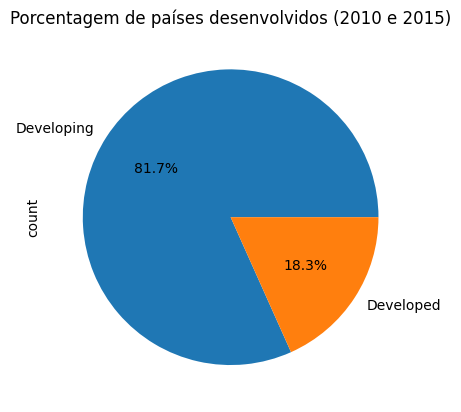

In [59]:
df_filtrado["Status"].value_counts().plot.pie(autopct="%.1f%%", title="Porcentagem de países desenvolvidos (2010 e 2015)");

### 2. Considerando a base anterior, construa um histograma para a variável Life_expectancy. Qual a média e variância desse atributo?

Text(0, 0.5, 'Frequência (Número de Ocorrências)')

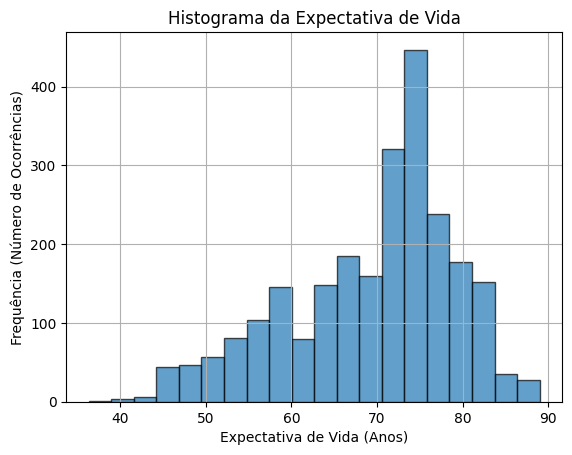

In [66]:
df["Life_expectancy"].hist(bins=20, edgecolor='black', alpha=0.7)

# 3. Adicionar o título e rótulos aos eixos usando Matplotlib
plt.title("Histograma da Expectativa de Vida")
plt.xlabel("Expectativa de Vida (Anos)")
plt.ylabel("Frequência (Número de Ocorrências)")

In [70]:
mean_life_expectancy = df["Life_expectancy"].mean()
variance_life_expectancy = df["Life_expectancy"].var()
print(f"Média da Expectativa de Vida: {mean_life_expectancy:.2f} anos")
print(f"Variância da Expectativa de Vida: {variance_life_expectancy:.2f} anos")

Média da Expectativa de Vida: 69.46 anos
Variância da Expectativa de Vida: 92.92 anos


### 3. Mostre a série temporal da variável Life_Expectancy para os países: Ireland, Finland, Netherlands, Zambia, Angola. Os países com maior e menor expectativas de vida em 2014 são:

In [75]:
paises_selecionados = ['Ireland', 'Finland', 'Netherlands', 'Zambia', 'Angola']
df_paises = df[df['Country'].isin(paises_selecionados)]

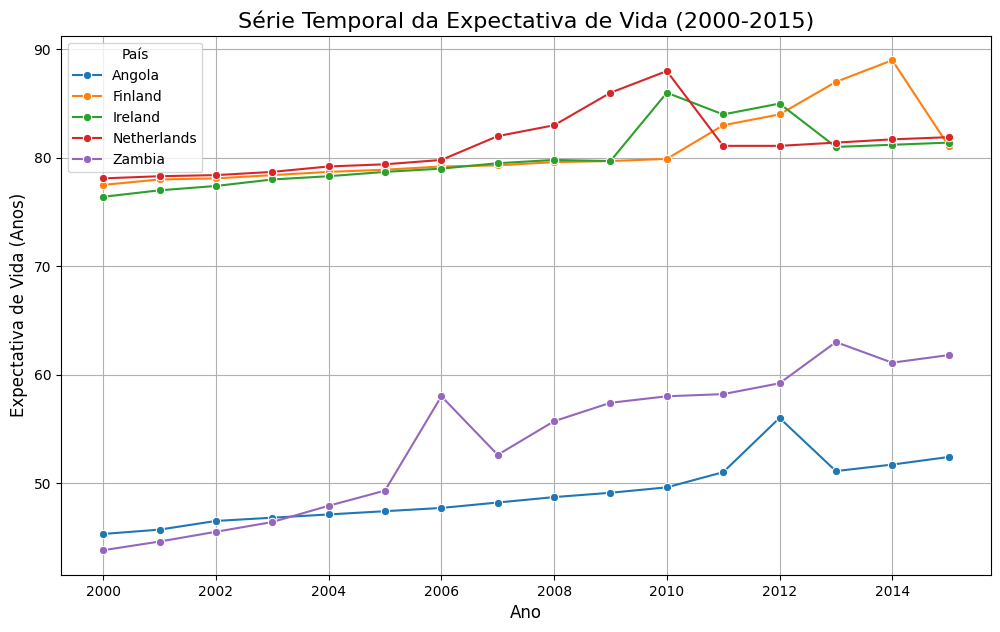

In [79]:
# Criar o gráfico de linha (série temporal)
plt.figure(figsize=(12, 7))  # Define um bom tamanho para o gráfico
sns.lineplot(data=df_paises, x='Year', y='Life_expectancy', hue='Country', marker='o')

# Adicionar títulos e rótulos para maior clareza
plt.title('Série Temporal da Expectativa de Vida (2000-2015)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Expectativa de Vida (Anos)', fontsize=12)
plt.grid(True)
plt.legend(title='País')
plt.show()

In [81]:
# Filtrar o DataFrame apenas para o ano de 2014
df_2014 = df[df['Year'] == 2014].copy()

# Remover linhas com valores nulos para garantir uma comparação justa
df_2014.dropna(subset=['Life_expectancy'], inplace=True)

# Encontrar o país com a MAIOR expectativa de vida
pais_maior = df_2014.sort_values(by='Life_expectancy', ascending=False).iloc[0]

# Encontrar o país com a MENOR expectativa de vida
pais_menor = df_2014.sort_values(by='Life_expectancy', ascending=True).iloc[0]

# Resultados
print(f"País com MAIOR expectativa de vida: {pais_maior['Country']} ({pais_maior['Life_expectancy']:.1f} anos)")
print(f"País com MENOR expectativa de vida: {pais_menor['Country']} ({pais_menor['Life_expectancy']:.1f} anos)")


País com MAIOR expectativa de vida: Belgium (89.0 anos)
País com MENOR expectativa de vida: Sierra Leone (48.1 anos)


### 4. Faça um boxplot para a variável Schooling. Considere os países: 'Ireland', 'Finland', 'Netherlands', 'Zambia', 'Angola'. Em termos da mediana, qual deles apresenta maior nível de escolaridade?

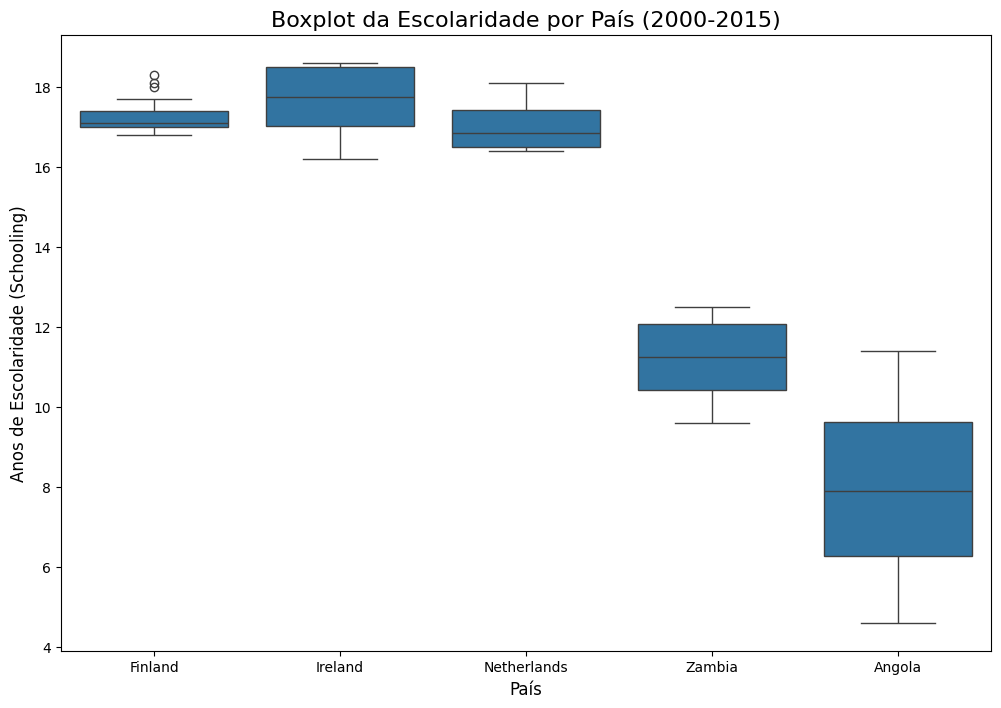

In [83]:
paises_selecionados = ['Ireland', 'Finland', 'Netherlands', 'Zambia', 'Angola']

# 4. Filtrar o DataFrame para conter apenas esses países
df_paises = df[df['Country'].isin(paises_selecionados)]

# 5. Criar o boxplot
plt.figure(figsize=(12, 8)) # Ajustar o tamanho da figura
sns.boxplot(data=df_paises, x='Country', y='Schooling',
            order=['Finland', 'Ireland', 'Netherlands', 'Zambia', 'Angola']) # Ordena para melhor visualização

# 6. Adicionar títulos e rótulos
plt.title('Boxplot da Escolaridade por País (2000-2015)', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Anos de Escolaridade (Schooling)', fontsize=12)
plt.show()

In [85]:
# 7. Calcular a mediana de 'Schooling' para cada país
medianas_escolaridade = df_paises.groupby('Country')['Schooling'].median()

# 8. Ordenar os valores da maior para a menor
medianas_ordenadas = medianas_escolaridade.sort_values(ascending=False)

# 9. Imprimir os resultados
print("Mediana de Anos de Escolaridade para cada país:")
print("-" * 50)
print(medianas_ordenadas)
print("-" * 50)

# 10. Imprimir o país com a maior mediana
print(f"\nO país com o maior nível de escolaridade (mediana) é: {medianas_ordenadas.index[0]} com {medianas_ordenadas.iloc[0]} anos de escolaridade.")

Mediana de Anos de Escolaridade para cada país:
--------------------------------------------------
Country
Ireland        17.75
Finland        17.10
Netherlands    16.85
Zambia         11.25
Angola          7.90
Name: Schooling, dtype: float64
--------------------------------------------------

O país com o maior nível de escolaridade (mediana) é: Ireland com 17.75 anos de escolaridade.


### 5. Importe os dados do link: 
- Construa a matriz de correlação. Quais as variáveis menos correlacionadas?

##### Carregando os dados: 

In [95]:
url = "https://www.worldometers.info/world-population/population-by-country/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table')
df = pd.read_html(str(table))[0]
df.head()

/var/folders/_s/0t16g1qd2sb1tqhbp674fjy00000gn/T/ipykernel_5376/286768636.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


,#,Country (or dependency),Population 2025,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Median Age,Urban Pop %,World Share
0,1,India,1463865525,0.89%,12929734,492,2973190,"−495,753",1.94,28.8,37.1%,17.78%
1,2,China,1416096094,−0.23%,"−3,225,184",151,9388211,"−268,126",1.02,40.1,67.5%,17.20%
2,3,United States,347275807,0.54%,1849236,38,9147420,1230663,1.62,38.5,82.8%,4.22%
3,4,Indonesia,285721236,0.79%,2233305,158,1811570,"−39,509",2.10,30.4,59.6%,3.47%
4,5,Pakistan,255219554,1.57%,3950390,331,770880,"−1,235,336",3.50,20.6,34.4%,3.10%


##### Limpeza dos dados

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #                        233 non-null    int64  
 1   Country (or dependency)  233 non-null    object 
 2   Population 2025          233 non-null    int64  
 3   Yearly Change            233 non-null    object 
 4   Net Change               233 non-null    object 
 5   Density (P/Km²)          233 non-null    int64  
 6   Land Area (Km²)          233 non-null    int64  
 7   Migrants (net)           233 non-null    object 
 8   Fert. Rate               233 non-null    float64
 9   Median Age               233 non-null    float64
 10  Urban Pop %              210 non-null    object 
 11  World Share              233 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 22.0+ KB


In [99]:
print(f"Soma dos valores NaN: \n\n{df.isnull().sum()}")  

Soma dos valores NaN: 

#                           0
Country (or dependency)     0
Population 2025             0
Yearly Change               0
Net Change                  0
Density (P/Km²)             0
Land Area (Km²)             0
Migrants (net)              0
Fert. Rate                  0
Median Age                  0
Urban Pop %                23
World Share                 0
dtype: int64


##### Apesar da Matriz de Correlação `.corr()` ignorar valores NaN por padrão, devemos tratar esses valores: 

In [101]:
# --- 1. Carregar os Dados ---
url = "https://www.worldometers.info/world-population/population-by-country/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table')
df = pd.read_html(str(table))[0]

# --- 2. Limpeza e Conversão da Coluna 'Urban Pop %' ---

# Faz uma cópia para não alterar o DataFrame original
df_tratado = df.copy()

print(f"Tipo de dado ANTES do tratamento: {df_tratado['Urban Pop %'].dtype}")
print(f"Valores únicos ANTES do tratamento: {df_tratado['Urban Pop %'].unique()[:5]}...") # Mostra exemplos

# Substitui 'N.A.' por NaN, remove '%' e converte para numérico
# O errors='coerce' transforma qualquer valor que não pode ser convertido em NaN
df_tratado['Urban Pop %'] = df_tratado['Urban Pop %'].str.replace('N.A.', '', regex=False)
df_tratado['Urban Pop %'] = df_tratado['Urban Pop %'].str.rstrip('%')
df_tratado['Urban Pop %'] = pd.to_numeric(df_tratado['Urban Pop %'], errors='coerce')


print(f"\nTipo de dado DEPOIS do tratamento: {df_tratado['Urban Pop %'].dtype}")
print(f"Soma de valores NaN DEPOIS do tratamento: {df_tratado['Urban Pop %'].isnull().sum()}")

# --- 3. Imputação com a Mediana (Agora com a coluna numérica) ---

# Calcula a mediana da coluna (agora numérica)
mediana_urban_pop = df_tratado['Urban Pop %'].median()
print(f"\nA mediana calculada para 'Urban Pop %' é: {mediana_urban_pop:.2f}")

# Preenche os valores NaN com a mediana
df_tratado['Urban Pop %'].fillna(mediana_urban_pop, inplace=True)

print(f"\nSoma de valores NaN APÓS a imputação: {df_tratado['Urban Pop %'].isnull().sum()}")

Tipo de dado ANTES do tratamento: object
Valores únicos ANTES do tratamento: ['37.1%' '67.5%' '82.8%' '59.6%' '34.4%']...

Tipo de dado DEPOIS do tratamento: float64
Soma de valores NaN DEPOIS do tratamento: 23

A mediana calculada para 'Urban Pop %' é: 62.05

Soma de valores NaN APÓS a imputação: 0


/var/folders/_s/0t16g1qd2sb1tqhbp674fjy00000gn/T/ipykernel_5376/3548789295.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
/var/folders/_s/0t16g1qd2sb1tqhbp674fjy00000gn/T/ipykernel_5376/3548789295.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tratado['Urban Pop %'].fillna(mediana_urban_pop, inplace=True)


##### Note que ainda temos colunas tipo `object`que precisamos converter antes de aplicar `.corr()`

In [106]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #                        233 non-null    int64  
 1   Country (or dependency)  233 non-null    object 
 2   Population 2025          233 non-null    int64  
 3   Yearly Change            233 non-null    float64
 4   Net Change               233 non-null    int64  
 5   Density (P/Km²)          233 non-null    int64  
 6   Land Area (Km²)          233 non-null    int64  
 7   Migrants (net)           233 non-null    int64  
 8   Fert. Rate               233 non-null    float64
 9   Median Age               233 non-null    float64
 10  Urban Pop %              233 non-null    float64
 11  World Share              226 non-null    float64
dtypes: float64(5), int64(6), object(1)
memory usage: 22.0+ KB


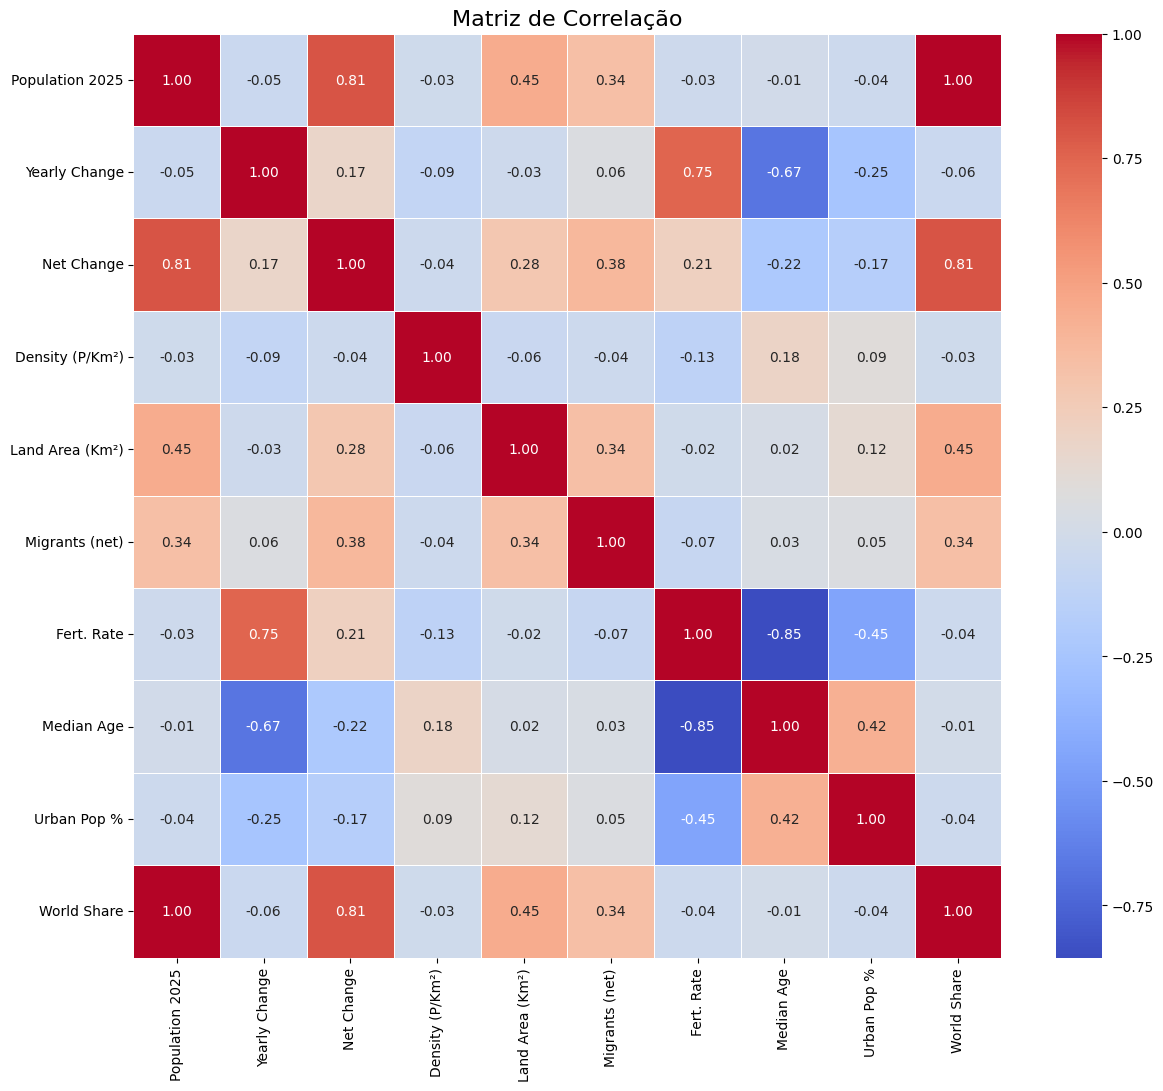

In [ ]:
# 1. Lista das colunas que AINDA precisam de limpeza
colunas_para_limpar = [
    'Yearly Change',
    'Net Change',
    'Migrants (net)',
    'World Share'
]

# 2. Loop para limpar e converter apenas as colunas restantes
for col in colunas_para_limpar:
    # Remove caracteres não numéricos (como '%' e ',')
    df_tratado[col] = df_tratado[col].astype(str).str.replace(r'[^\d.-]', '', regex=True)
    
    # Converte para numérico (erros viram NaN, mas não esperamos nenhum aqui)
    df_tratado[col] = pd.to_numeric(df_tratado[col], errors='coerce')

# 3. Selecionar TODAS as colunas numéricas para a correlação
# O .select_dtypes é uma forma inteligente de pegar todas as colunas que são números
df_numerico = df_tratado.select_dtypes(include=np.number)

# Remove a coluna '#' que é apenas um índice e não é uma variável relevante
if '#' in df_numerico.columns:
    df_numerico = df_numerico.drop(columns=['#'])

# 4. Cálculo e Visualização da Matriz de Correlação
matriz_correlacao = df_numerico.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação', fontsize=16)
plt.show()

##### Pergunta: Quais as variáveis menos correlacionadas ?

Com base na matriz de correlação: As variáveis "Fert. Rate" e "Mediam Age" são as variáveis menos correlacionadas com -0.85. Seguido de "Yearly Change" e "Median Age" com -0.67. 
Isso mostra que essas variáveis estão partindo para direções diferentes, enquanto uma cresce a outra diminuí, por exemplo. 
